In [1]:
import scanpy as sc

#Read already processed anndata for control villi: refer to Placenta_scVI_controls_celltyping_LV15.ipynb.
results_control= "/data/analysis/preeclampsia_2019/spatial_data/Controls_placenta_scvi_040222.h5ad"

ldata= sc.read_h5ad(results_control)

In [3]:
sc.settings.set_figure_params(dpi=80)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,4)

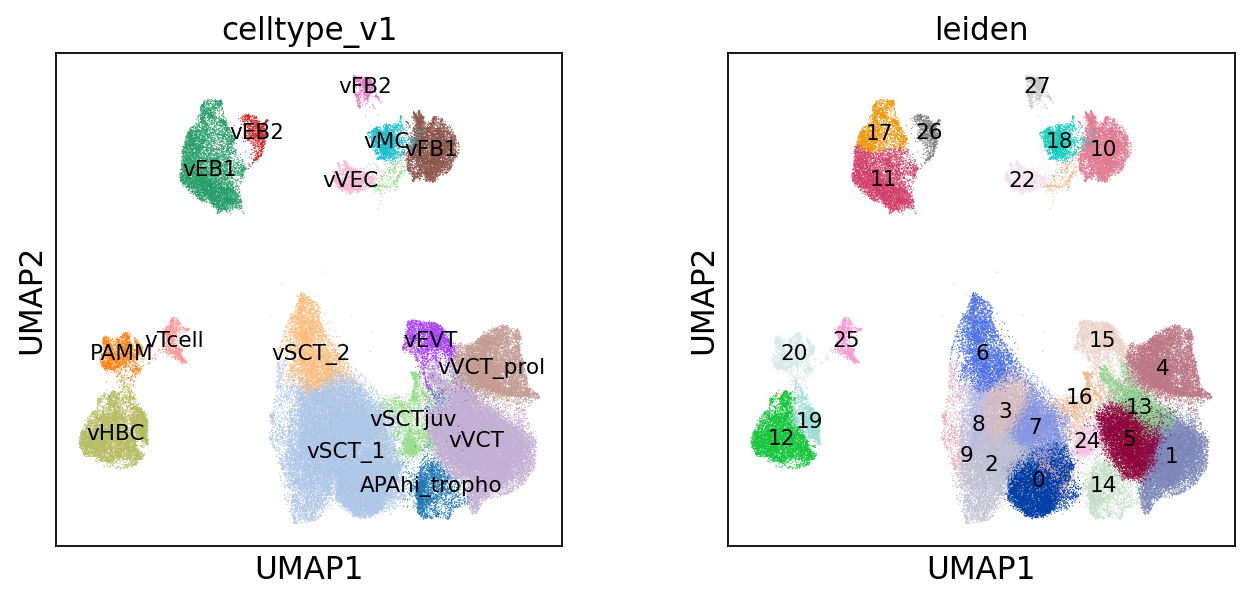

In [4]:
ldata.obs['celltype_v1'] = (ldata.obs["leiden"].map(lambda x: {"12": "vHBC", "19": "vHBC", "20": "PAMM", "25": "vTcell",
                                                              "17": "vEB1", "11": "vEB1", "26": "vEB2", 
                                                              "27": "vFB2", "10": "vFB1", "18": "vMC", "22": "vVEC", 
                                                              "15": "vEVT", "4": "vVCT_prol", "1": "vVCT", 
                                                              "5": "vVCT", "13": "vVCT", "14": "APAhi_tropho", 
                                                              "16": "vSCTjuv", "24": "vSCTjuv", 
                                                              "0": "vSCT_1", "7": "vSCT_1", "8": "vSCT_1",
                                                              "9": "vSCT_1", "2": "vSCT_1", "3": "vSCT_1",
                                                              "6": "vSCT_2"}.get(x, x)).astype("category"))

sc.pl.umap(ldata, color=["celltype_v1", "leiden"], legend_loc= "on data", 
          legend_fontweight= 'normal', legend_fontsize= 'x-small')

In [5]:
#Note: 
#FB2 is specific to donor-34. So, exclude it from ISS analysis. 
#EB1 & EB2 can be merged to EB. Use the main EB signatures. 
#Unsure of Leiden cluster-24. It shows robust VCT markers and also, CSH1/2/TFPI2 & also, few SCT genes. 
#So, either both L16 & 24 are SCTjuv. Or, L24 is a spurious cluster. 

In [6]:
#create the raw anndata version:
ldata_norm= ldata.raw.to_adata()

ldata_norm #get the full matrix

AnnData object with n_obs × n_vars = 111787 × 29148
    obs: 'batch', 'cohort', 'disease', 'donor_id', 'gestational_days', 'gestational_weeks', 'library', 'maternal_BMI', 'maternal_age', 'placental_volume', 'procurement', 'smoking', 'time', 'tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_MT_genes', 'log1p_total_counts_MT_genes', 'pct_counts_MT_genes', 'total_counts_Ribo_genes', 'log1p_total_counts_Ribo_genes', 'pct_counts_Ribo_genes', 'total_counts_HB_genes', 'log1p_total_counts_HB_genes', 'pct_counts_HB_genes', 'percent_mt2', 'n_counts', 'percent_Ribo2', 'percent_HB2', 'n_genes', 'XIST-counts', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden', 'celltypist_majority_voting', 'celltypist_predicted_labels', 'LDA_topic_0', 'LDA_topic_1', 'LDA_topic_2', 'LDA_topic_3', 'LDA_topic_4', 'LDA_topic_5', 'LDA_topic_6', 'LDA_topic_7', 'LDA_topic_8', 'LDA_topic_9', 'LDA_to

In [7]:
#Log-normalize (or use whatever) for further use:
sc.pp.normalize_total(ldata_norm, target_sum=1e4)
sc.pp.log1p(ldata_norm)

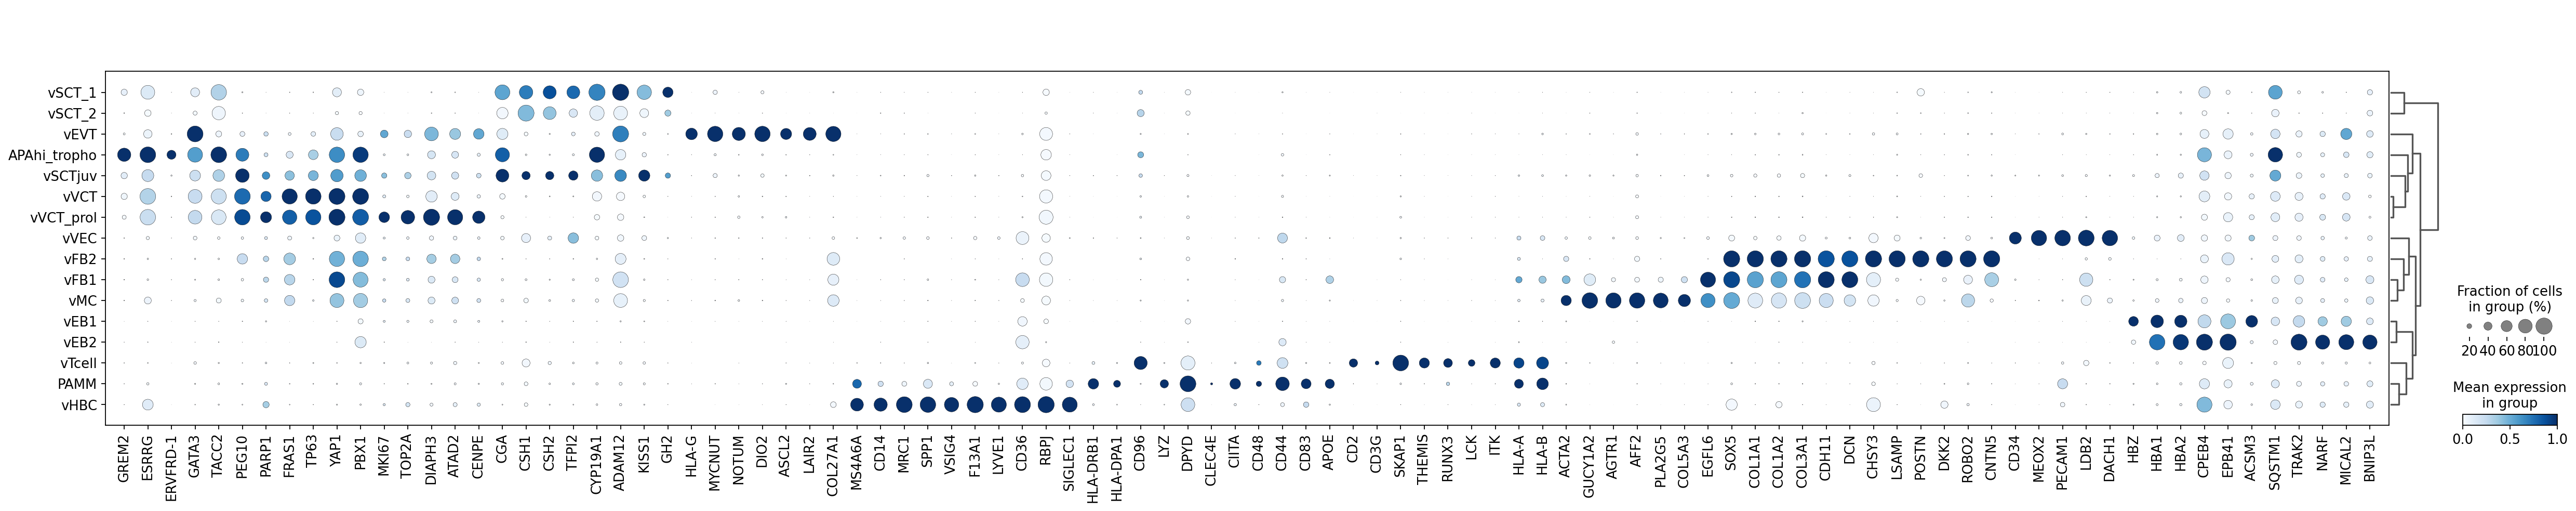

In [16]:
#Established cell types/states: 
cell_markers= ['GREM2', 'ESRRG', 'ERVFRD-1', 'GATA3', 'TACC2', 'PEG10', 'PARP1', 'FRAS1', 'TP63', 'YAP1', 'PBX1', 
               'MKI67', 'TOP2A', 'DIAPH3', 'ATAD2', 'CENPE', 'CGA', 'CSH1', 'CSH2', 'TFPI2', 
               'CYP19A1', 'ADAM12', 'KISS1', 'GH2', 'HLA-G', 'MYCNUT', 'NOTUM', 'DIO2', 'ASCL2', 'LAIR2', 
              'COL27A1', 'MS4A6A', 'CD14', 'MRC1', 'SPP1', 'VSIG4', 'F13A1', 'LYVE1', 'CD36', 'RBPJ', 
               'SIGLEC1', 'HLA-DRB1', 'HLA-DPA1', 'CD96', 'LYZ', 'DPYD', 'CLEC4E', 'CIITA', 'CD48', 'CD44', 'CD83', 'APOE', 
               'CD2', 'CD3G', 'SKAP1', 'THEMIS', 'RUNX3', 'LCK', 'ITK', 'HLA-A', 'HLA-B', 
               'ACTA2', 'GUCY1A2', 'AGTR1', 'AFF2', 'PLA2G5', 'COL5A3', 
               'EGFL6', 'SOX5', 'COL1A1','COL1A2', 'COL3A1', 'CDH11', 'DCN', 
               'CHSY3', 'LSAMP','POSTN', 'DKK2', 'ROBO2', 'CNTN5', 
               'CD34', 'MEOX2', 'PECAM1', 'LDB2', 'DACH1',
               'HBZ', 'HBA1', 'HBA2', 'CPEB4', 'EPB41', 'ACSM3', 'SQSTM1', 'TRAK2', 'NARF', 'MICAL2', 'BNIP3L']

sc.pl.dotplot(ldata, cell_markers, groupby='celltype_v1', dendrogram=True, 
              color_map="Blues", use_raw=True, standard_scale="var")

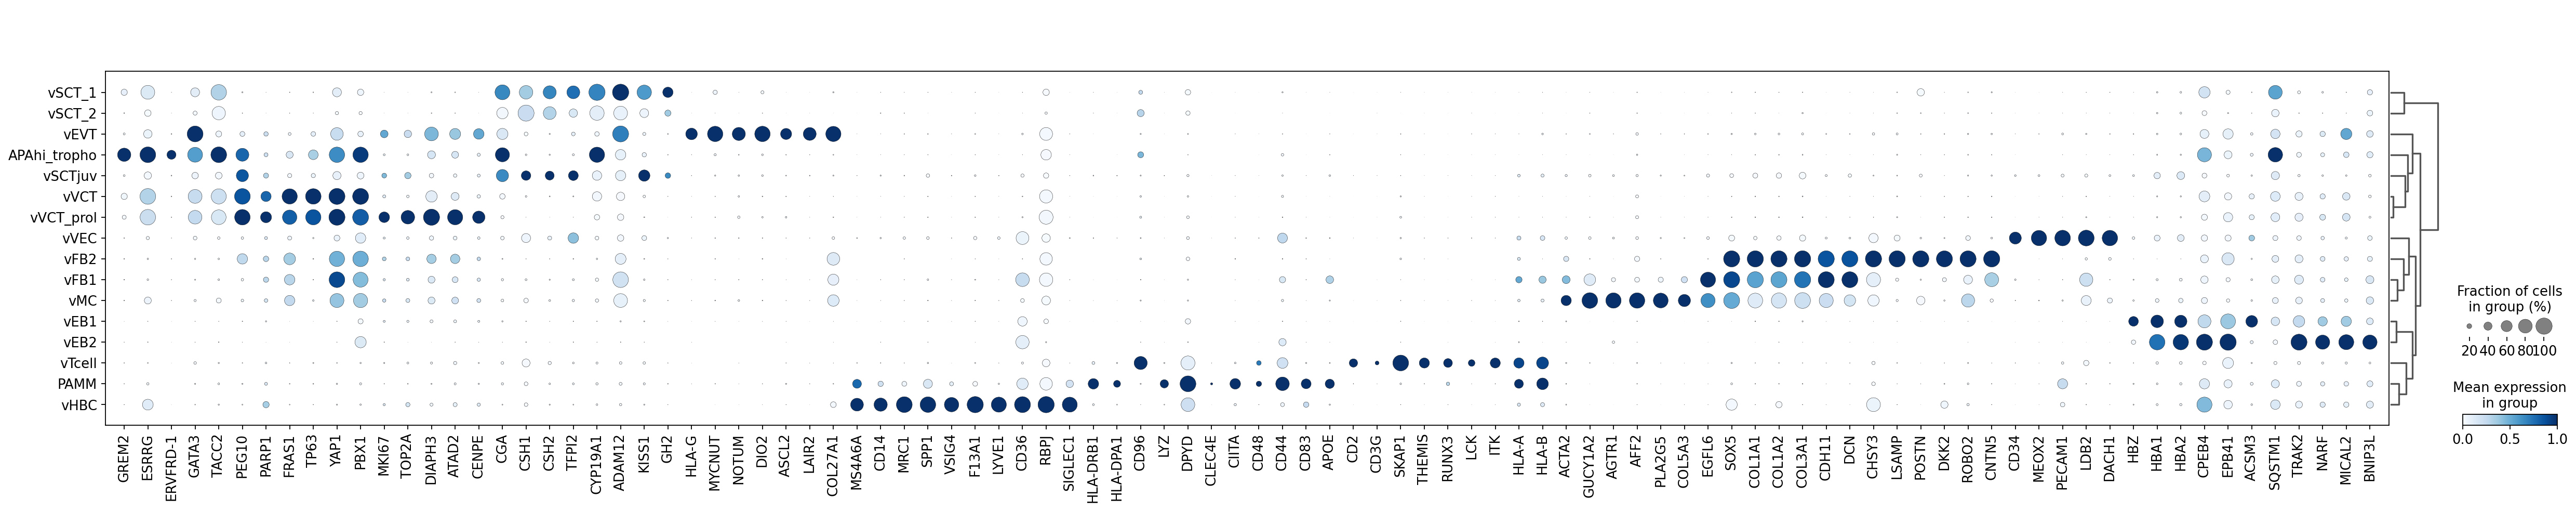

In [17]:
#After removing L24: 
sc.pl.dotplot(ldata[ldata.obs['leiden']!= '24'], cell_markers, groupby='celltype_v1', dendrogram=True,
    color_map="Blues", use_raw=True, standard_scale="var")

In [21]:
ldata.uns['celltype_v1_colors']= ['#ff0000', '#c0c999', '#9e1a1a', '#721313', '#5c7aff', '#dec1ff', '#8c29ff',
                                 '#fe6776', '#63264a', '#ff99cc', '#ff0080', '#cc33ff', '#a799b7', '#00b3b3', '#004d4d', 
                                 '#fd96A9']

In [22]:
#Barplots for each patient:
#Split sample composition by donor_id:

def make_bar_plots(adata, anno_groupby = 'time',
                         anno_subsets = 'celltype_v1',
                         anno_pointdef = 'donor_id',
                         save_file = 'Cell_comp_ctrls_0902_v1.pdf'):
    
    ## Get number of categories
    labels = adata.obs[anno_groupby].cat.categories.tolist()
    n_labels = len(labels)
    subset_ids = adata.obs[anno_subsets].cat.categories.tolist()
    n_subsets = len(subset_ids)
    patient_ids = adata.obs[anno_pointdef].unique()
    n_patients = len(patient_ids)

    ## Calculate subset fractions
    subset_frac = pd.DataFrame(np.empty([n_patients, n_subsets]),
                                    index = patient_ids ,
                                    columns = subset_ids)
    for i in np.arange(n_patients):
        ind2 = adata.obs[anno_pointdef] == patient_ids[i]
        for j in np.arange(n_subsets):
            ind1 = adata.obs[anno_subsets] == subset_ids[j]
            subset_frac.iloc[i,j] = sum(ind1&ind2)
    subset_frac = subset_frac.apply(lambda x: x/sum(x),axis=1)

    ## Get patient labels
    patient_phenos = pd.DataFrame(index = subset_frac.index, columns=[anno_groupby])
    for i in range(0,len(labels)):
        p_list = adata.obs[anno_pointdef][adata.obs[anno_groupby] == labels[i]].unique().tolist()
        patient_phenos[anno_groupby][p_list] = labels[i]
    patient_phenos['time'] = patient_phenos['time'].astype('category')
    patient_phenos['time'] = patient_phenos['time'].cat.reorder_categories(labels)
    ord_ind = patient_phenos.sort_values('time', ascending=False).index

    subset_frac = subset_frac.loc[ord_ind]

    fig, axes = plt.subplots(1,1, figsize=(9,12))

    subset_frac.plot.barh(stacked=True, grid=False, legend=False, ax=axes, color= ['#ff0000', '#c0c999', '#9e1a1a', '#721313', '#5c7aff', '#dec1ff', '#8c29ff',
                                 '#fe6776', '#63264a', '#ff99cc', '#ff0080', '#cc33ff', '#a799b7', '#00b3b3', '#004d4d', 
                                 '#fd96A9'])

    box = axes.get_position()
    axes.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    axes.legend(loc='lower right', bbox_to_anchor=(1.5, 0.5), frameon=True)
    sns.despine(left=True, bottom=True, right=True)
    plt.tight_layout()
    plt.savefig(save_file)

In [19]:
#ldata.uns['celltype_v1_colors']

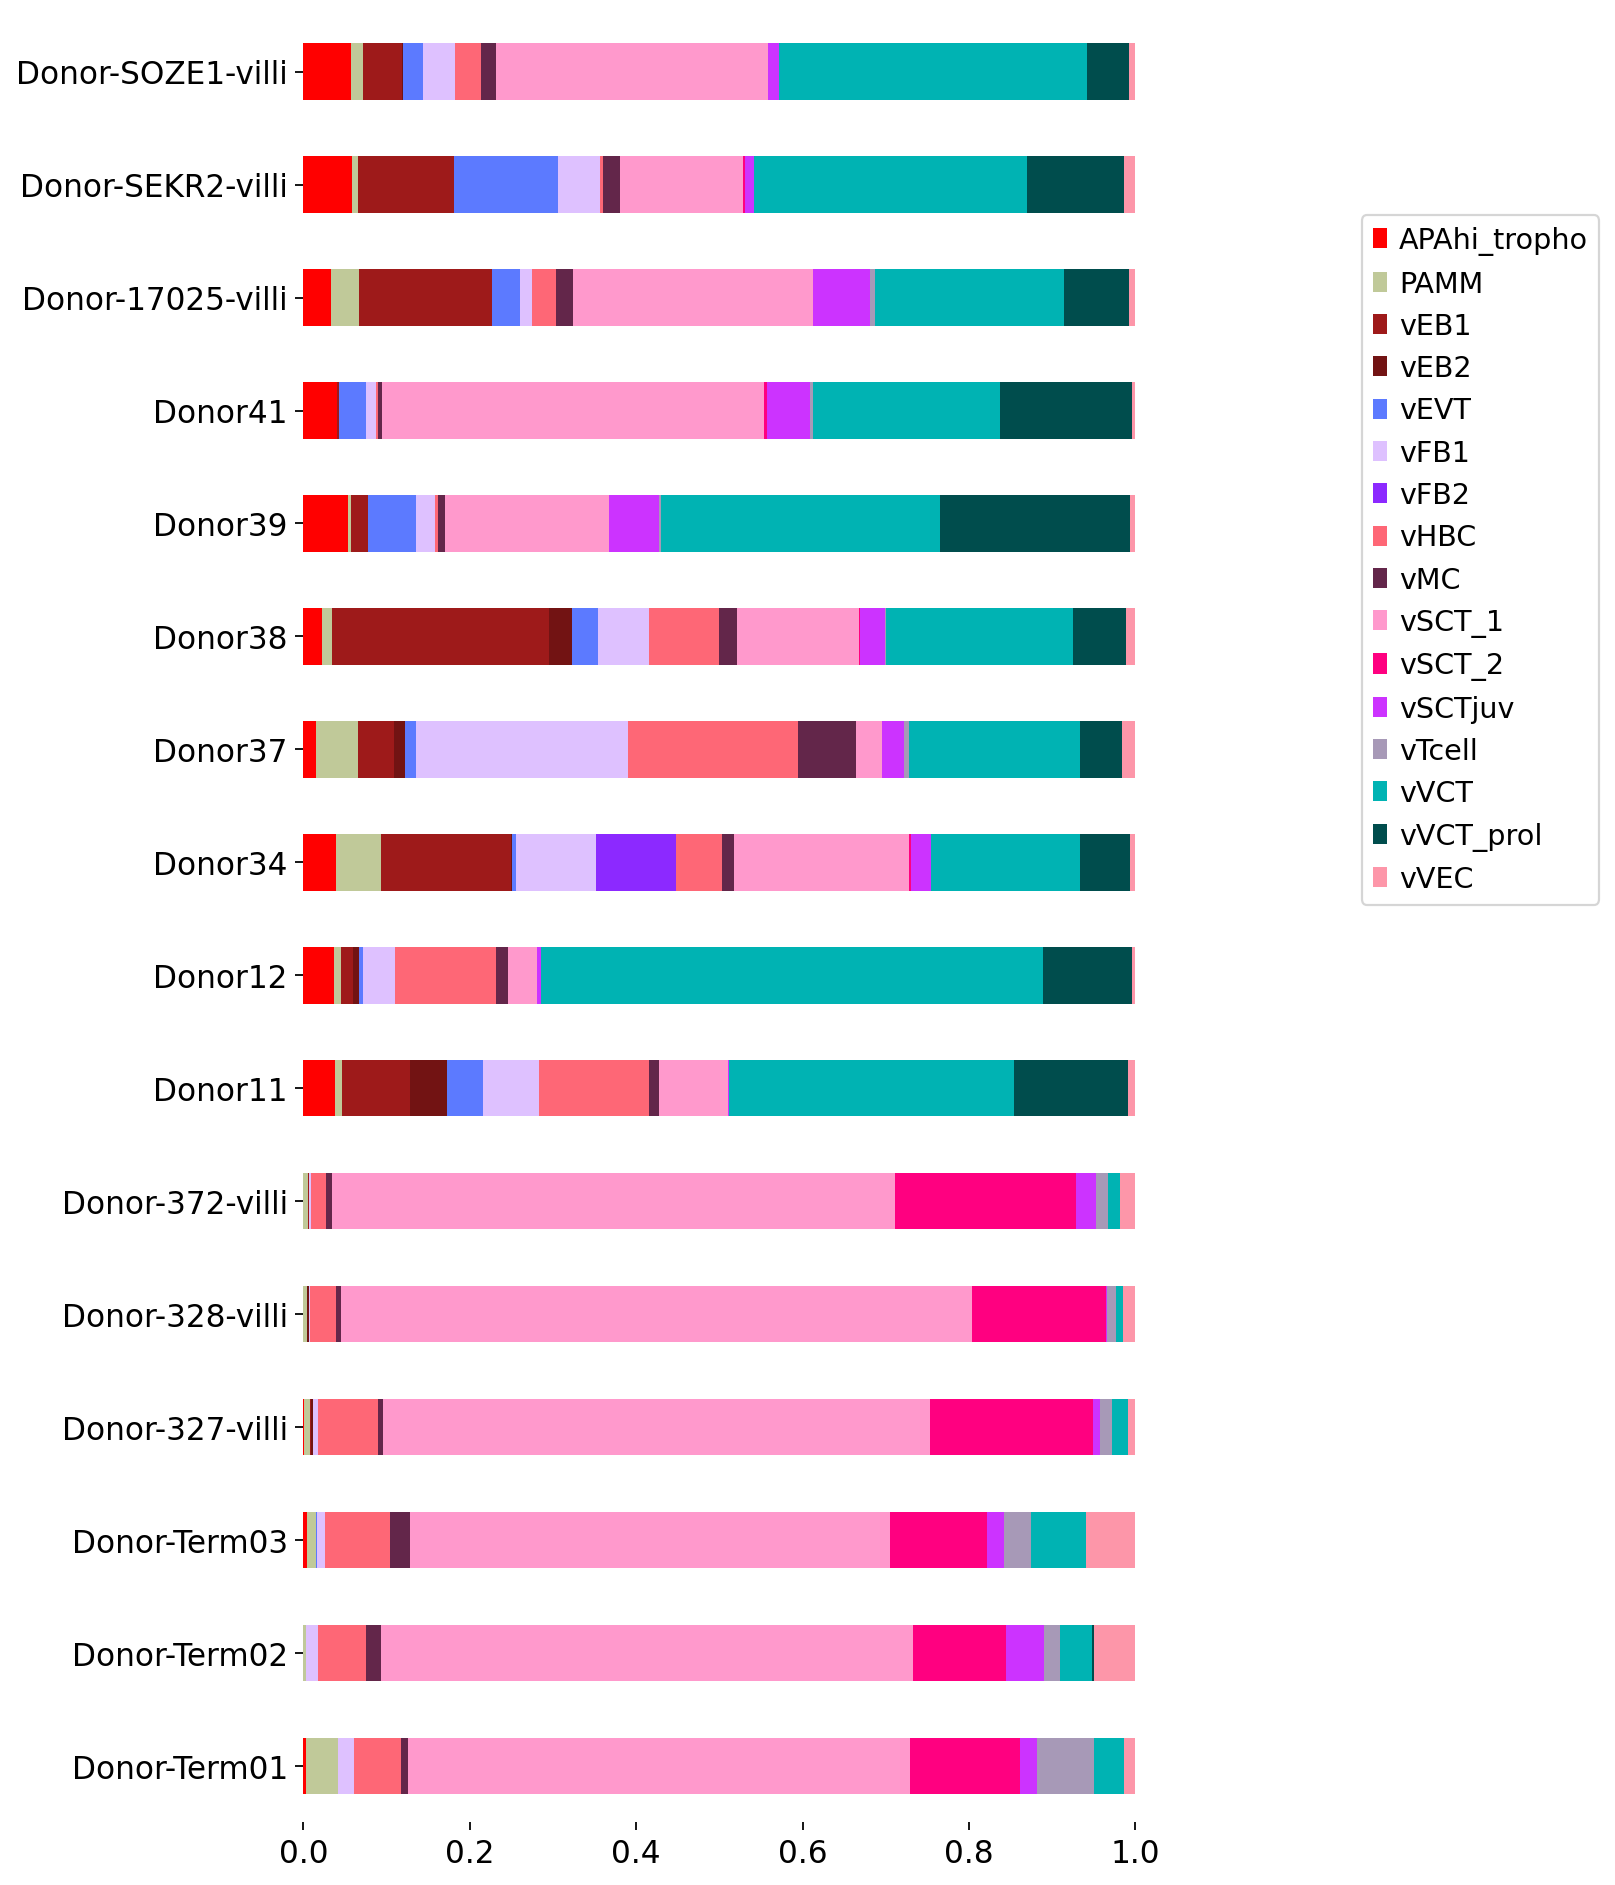

In [23]:
import seaborn as sns
import pandas as pd
import numpy as np

make_bar_plots(ldata)

In [24]:
#Separate early vs late term control data:
ldata.obs['time'].value_counts()

early        82044
late_term    29743
Name: time, dtype: int64

In [25]:
pd.crosstab(ldata.obs['celltype_v1'], ldata.obs['time'])

time,early,late_term
celltype_v1,,
APAhi_tropho,3098,42
PAMM,1354,377
vEB1,7440,12
vEB2,897,33
vEVT,2828,5
vFB1,5074,261
vFB2,669,0
vHBC,5385,1533
vMC,1562,319
